In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import cv2
import PIL

%matplotlib inline

In [2]:
# tf.get_logger().setLevel('ERROR')

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.', untar = True)

228813984/228813984 [==============================] - 6s 0us/step


In [4]:
data_dir

'./datasets/flower_photos'

In [5]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [6]:
image_count = len(list(data_dir.glob("*/*.jpg"))) # glob is use for file path searching
image_count

3670

In [7]:
roses = list(data_dir.glob('roses/*'))
roses

[PosixPath('datasets/flower_photos/roses/4588034197_e300b0872a_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8987479080_32ab912d10_n.jpg'),
 PosixPath('datasets/flower_photos/roses/6108118824_5b0231a56d.jpg'),
 PosixPath('datasets/flower_photos/roses/6125332325_b768e08bd9_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3550491463_3eb092054c_m.jpg'),
 PosixPath('datasets/flower_photos/roses/909277823_e6fb8cb5c8_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5061135742_2870a7b691_n.jpg'),
 PosixPath('datasets/flower_photos/roses/6676529655_9672b6f955_m.jpg'),
 PosixPath('datasets/flower_photos/roses/295257304_de893fc94d.jpg'),
 PosixPath('datasets/flower_photos/roses/16525204061_9b47be3726_m.jpg'),
 PosixPath('datasets/flower_photos/roses/12395698413_c0388278f7.jpg'),
 PosixPath('datasets/flower_photos/roses/3663244576_97f595cf4a.jpg'),
 PosixPath('datasets/flower_photos/roses/921138131_9e1393eb2b_m.jpg'),
 PosixPath('datasets/flower_photos/roses/5206847130_ee4bf0e4de_n.jpg'),
 

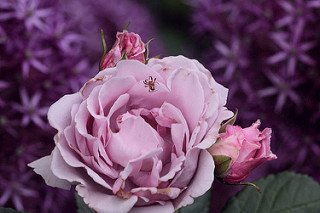

In [8]:
PIL.Image.open(roses[1])

In [9]:
daisy = list(data_dir.glob('daisy/*'))
daisy

[PosixPath('datasets/flower_photos/daisy/14591326135_930703dbed_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/9515186037_3be48fe68f.jpg'),
 PosixPath('datasets/flower_photos/daisy/7630517248_98fb8bee1f_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/5459481183_18d2d49e44_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/3098641292_76c908ba1f_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/7749368884_1fc58c67ff_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/18474740346_ffdaa18032.jpg'),
 PosixPath('datasets/flower_photos/daisy/4229503616_9b8a42123c_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/7320089276_87b544e341.jpg'),
 PosixPath('datasets/flower_photos/daisy/5586977262_6b24412805_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/20703737132_179560d0fb.jpg'),
 PosixPath('datasets/flower_photos/daisy/6323721068_3d3394af6d_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/1656856503_447e5b0f03.jpg'),
 PosixPath('datasets/flower_photos/daisy/7066602021_2647457985_m.jpg'),

In [10]:
dandelion = list(data_dir.glob('dandelion/*'))
dandelion

[PosixPath('datasets/flower_photos/dandelion/3475811950_0fb89845f5_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/14376454225_a1de336c5b.jpg'),
 PosixPath('datasets/flower_photos/dandelion/4562516418_8ccb8c103f.jpg'),
 PosixPath('datasets/flower_photos/dandelion/3393060921_2328b752f4.jpg'),
 PosixPath('datasets/flower_photos/dandelion/14439618952_470224b89b_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/8267315764_129f2e1d77_m.jpg'),
 PosixPath('datasets/flower_photos/dandelion/4573204407_babff0dce4_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/2608937632_cfd93bc7cd.jpg'),
 PosixPath('datasets/flower_photos/dandelion/14455605089_8bbfb41cd7_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/5109501167_2d9bbb0f27_m.jpg'),
 PosixPath('datasets/flower_photos/dandelion/2538797744_deb53ac253.jpg'),
 PosixPath('datasets/flower_photos/dandelion/4632761610_768360d425.jpg'),
 PosixPath('datasets/flower_photos/dandelion/4573886520_09c984ecd8_m.jpg'),
 PosixPath('datasets/

In [11]:
sunflowers = list(data_dir.glob('sunflowers/*'))
sunflowers

[PosixPath('datasets/flower_photos/sunflowers/14741813010_5d44e33088_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/4868595281_1e58083785.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/27465811_9477c9d044.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/15054864058_2edca122a9_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/6050020905_881295ac72_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/5007598545_90e08e81c1_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/2678588376_6ca64a4a54_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/2979133707_84aab35b5d.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/20022771089_3cc7e5086d_m.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/19508264965_d1dfb565ea_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/8928658373_fdca5ff1b8.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/23356825566_f5885875f2.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/3912497870_a2f91c3a65_n.jpg'),
 Posix

In [12]:
tulips = list(data_dir.glob('tulips/*'))
tulips

[PosixPath('datasets/flower_photos/tulips/3506615859_9850830cf0.jpg'),
 PosixPath('datasets/flower_photos/tulips/12557176134_ecbf15885b.jpg'),
 PosixPath('datasets/flower_photos/tulips/5529939805_1679b014e1_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/5565089564_a30c318f44.jpg'),
 PosixPath('datasets/flower_photos/tulips/4290566894_c7f061583d_m.jpg'),
 PosixPath('datasets/flower_photos/tulips/6325571510_7544b27e57_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/13903946578_187f904c9a_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/16751015081_af2ef77c9a_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/14064731501_ea14b58161.jpg'),
 PosixPath('datasets/flower_photos/tulips/13976191172_6f23a0b313.jpg'),
 PosixPath('datasets/flower_photos/tulips/13542672763_20c3cb9272.jpg'),
 PosixPath('datasets/flower_photos/tulips/112951022_4892b1348b_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/12024561754_ce9667e4dc_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/4574785121_5d8e

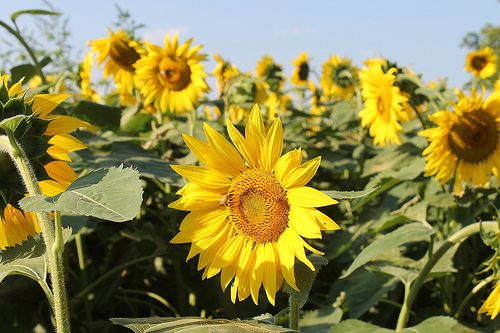

In [13]:
PIL.Image.open(sunflowers[10])

In [14]:
flowers_images_dict = {
    'roses' : roses,
    'daisy' : daisy,
    'dandelion' : dandelion,
    'sunflowers' : sunflowers,
    'tulip' : tulips
}

In [15]:
flowers_labels_dict = {
    'roses' : 0,
    'daisy' : 1,
    'dandelion' : 2,
    'sunflowers' : 3,
    'tulip' : 4
}

In [16]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img

array([[[191, 199, 206],
        [193, 201, 208],
        [196, 204, 211],
        ...,
        [119, 138, 141],
        [106, 129, 131],
        [ 88, 111, 113]],

       [[188, 196, 203],
        [188, 196, 203],
        [190, 198, 205],
        ...,
        [ 98, 119, 121],
        [ 89, 112, 114],
        [ 56,  79,  81]],

       [[189, 197, 204],
        [187, 195, 202],
        [188, 196, 203],
        ...,
        [112, 133, 135],
        [ 88, 111, 113],
        [ 64,  87,  89]],

       ...,

       [[140, 161, 189],
        [121, 142, 170],
        [126, 144, 173],
        ...,
        [ 83, 117, 163],
        [ 81, 115, 161],
        [ 90, 124, 170]],

       [[138, 156, 185],
        [134, 152, 181],
        [144, 160, 189],
        ...,
        [ 79, 113, 159],
        [ 92, 126, 172],
        [ 86, 120, 166]],

       [[125, 141, 170],
        [140, 156, 185],
        [137, 151, 180],
        ...,
        [ 78, 112, 158],
        [ 69, 103, 149],
        [ 89, 123, 169]]

In [17]:
img = cv2.resize(img, (180, 180))
img.shape

(180, 180, 3)

In [18]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [19]:
y[:5]

[0, 0, 0, 0, 0]

In [20]:
X = np.array(X)
y = np.array(y)

In [21]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, random_state=0)

In [22]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [23]:
X_train_scaled.shape

(2752, 180, 180, 3)

In [24]:
y_train[0]

2

In [25]:
model = keras.Sequential([
    keras.layers.Conv2D(16, 3, padding= 'same', activation='relu'), # CNN automatically detects the shape
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, 3, padding= 'same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, 3, padding= 'same', activation='relu'),
    keras.layers.MaxPooling2D(),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(5) # in the output layer we are not specifying any output function so it will consider it as linear function
])

model.compile(optimizer = 'adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics = ['accuracy'])

model.fit(X_train_scaled, y_train, epochs = 30)

Epoch 1/30
86/86 [==============================] - 10s 24ms/step - loss: 1.3368 - accuracy: 0.4382
Epoch 2/30
86/86 [==============================] - 2s 24ms/step - loss: 1.0562 - accuracy: 0.5850
Epoch 3/30
86/86 [==============================] - 2s 24ms/step - loss: 0.8743 - accuracy: 0.6715
Epoch 4/30
86/86 [==============================] - 2s 25ms/step - loss: 0.6921 - accuracy: 0.7366
Epoch 5/30
86/86 [==============================] - 2s 27ms/step - loss: 0.5248 - accuracy: 0.8118
Epoch 6/30
86/86 [==============================] - 2s 24ms/step - loss: 0.3239 - accuracy: 0.8932
Epoch 7/30
86/86 [==============================] - 2s 24ms/step - loss: 0.1949 - accuracy: 0.9342
Epoch 8/30
86/86 [==============================] - 2s 24ms/step - loss: 0.1619 - accuracy: 0.9488
Epoch 9/30
86/86 [==============================] - 2s 24ms/step - loss: 0.1013 - accuracy: 0.9717
Epoch 10/30
86/86 [==============================] - 2s 24ms/step - loss: 0.0658 - accuracy: 0.9836
Epoch 11

In [26]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 1s 19ms/step - loss: 2.3431 - accuracy: 0.6438


[2.343113660812378, 0.6437908411026001]

In [27]:
predictions = model.predict(X_test_scaled)

29/29 [==============================] - 0s 14ms/step


In [28]:
score = tf.nn.softmax(predictions[0]) # it gives us the probability
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([3.1547993e-03, 5.4436555e-06, 9.9363035e-01, 1.7122938e-11,
       3.2093888e-03], dtype=float32)>

In [29]:
np.argmax(score)

2

In [30]:
y_test[0]

1

In [31]:
data_augmentation = keras.Sequential( # this will generate new images
  [
    keras.layers.experimental.preprocessing.RandomFlip("horizontal",  # this will flip the image 
                                                 input_shape=(180, 
                                                              180,
                                                              3)),
    keras.layers.experimental.preprocessing.RandomRotation(0.1), # this will rotate the image
    keras.layers.experimental.preprocessing.RandomZoom(0.1), # this will zoom the image
  ]
)

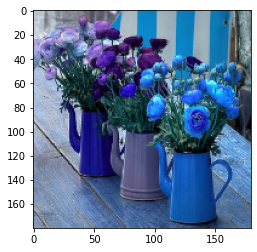

In [32]:
plt.imshow(X[0])

In [33]:
data_augmentation(X)

<tf.Tensor: shape=(3670, 180, 180, 3), dtype=float32, numpy=
array([[[[144.86082  , 156.0584   , 203.81519  ],
         [146.42355  , 155.75407  , 203.20059  ],
         [152.45853  , 157.1195   , 199.42314  ],
         ...,
         [ 15.96993  , 117.519585 , 174.09787  ],
         [ 15.741284 , 116.20573  , 172.03322  ],
         [ 15.147903 , 115.456635 , 170.5379   ]],

        [[152.32205  , 159.98218  , 209.8163   ],
         [153.00336  , 159.487    , 210.29343  ],
         [156.9632   , 159.60951  , 209.40997  ],
         ...,
         [ 15.745285 , 117.69317  , 174.5925   ],
         [ 15.140245 , 116.02799  , 172.74994  ],
         [ 14.74326  , 114.86566  , 171.09464  ]],

        [[165.8346   , 165.1789   , 217.87454  ],
         [162.3717   , 161.17076  , 215.68822  ],
         [163.27538  , 160.37947  , 215.14342  ],
         ...,
         [ 16.213472 , 117.75563  , 175.48404  ],
         [ 14.664468 , 116.71227  , 174.24257  ],
         [ 14.497806 , 115.35622  , 172.814

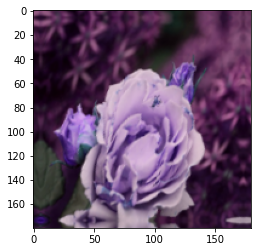

In [34]:
plt.imshow(data_augmentation(X)[1].numpy().astype('uint8'))

In [35]:
model = keras.Sequential([
    data_augmentation,
    keras.layers.Conv2D(16, 3, padding= 'same', activation='relu'), # CNN automatically detects the shape
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, 3, padding= 'same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, 3, padding= 'same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(5) # in the output layer we are not specifying any output function so it will consider it as linear function
])

model.compile(optimizer = 'adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics = ['accuracy'])

model.fit(X_train_scaled, y_train, epochs = 30)

Epoch 1/30
86/86 [==============================] - 5s 42ms/step - loss: 1.5877 - accuracy: 0.3310
Epoch 2/30
86/86 [==============================] - 4s 41ms/step - loss: 1.1529 - accuracy: 0.5273
Epoch 3/30
86/86 [==============================] - 4s 41ms/step - loss: 1.0093 - accuracy: 0.6039
Epoch 4/30
86/86 [==============================] - 4s 41ms/step - loss: 0.9399 - accuracy: 0.6359
Epoch 5/30
86/86 [==============================] - 4s 41ms/step - loss: 0.8992 - accuracy: 0.6588
Epoch 6/30
86/86 [==============================] - 4s 41ms/step - loss: 0.8587 - accuracy: 0.6672
Epoch 7/30
86/86 [==============================] - 4s 41ms/step - loss: 0.8035 - accuracy: 0.6922
Epoch 8/30
86/86 [==============================] - 4s 41ms/step - loss: 0.7802 - accuracy: 0.6977
Epoch 9/30
86/86 [==============================] - 4s 41ms/step - loss: 0.7297 - accuracy: 0.7220
Epoch 10/30
86/86 [==============================] - 4s 41ms/step - loss: 0.6989 - accuracy: 0.7351
Epoch 11/

In [37]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 1s 16ms/step - loss: 0.8998 - accuracy: 0.7440


[0.8997513651847839, 0.7440087199211121]

In [38]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [39]:
tf.test.is_built_with_cuda()

True